In [18]:
# standard import
import pandas as pd
import numpy as np

# sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# miscilaneous models
import openml
from ucimlrepo import fetch_ucirepo
import os

# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [19]:
X = pd.read_csv("data/data_abalone/X.csv")

In [20]:
sorted_idx = X['Sex'].argsort()

In [21]:
np.bincount(X['Sex'])

array([1307, 1342, 1528])

In [22]:
# read in feature importances
base_dir = "lfi-values/fulldata/rf/"
lotla_values = {}
shap_values = {}
lime_values = {}
first_breakpoint = {}
second_breakpoint = {}
for seed in range(5):
    # split data into training and testing
    X_train, X_test = train_test_split(X, test_size = 0.5, random_state = seed)
    sorted_idx = X_test['Sex'].argsort()
    first_breakpoint[seed] = np.bincount(X_test['Sex'])[0]
    second_breakpoint[seed] = np.bincount(X_test['Sex'])[1] + first_breakpoint[seed]
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/abalone/elastic_nonnormed_nosquared_rank.csv", delimiter=",")[sorted_idx]
    shap_values[seed] = np.loadtxt(base_dir + f"seed{seed}/abalone/shap.csv", delimiter=",")[sorted_idx]
    lime_values[seed] = np.loadtxt(base_dir + f"seed{seed}/abalone/lime.csv", delimiter=",")[sorted_idx]

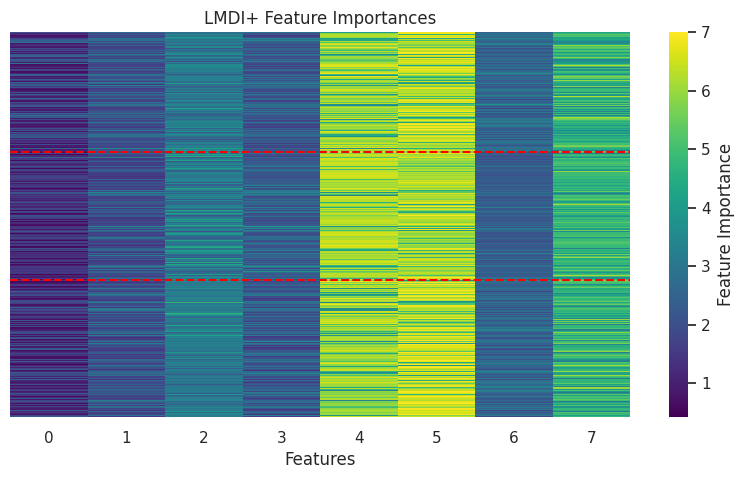

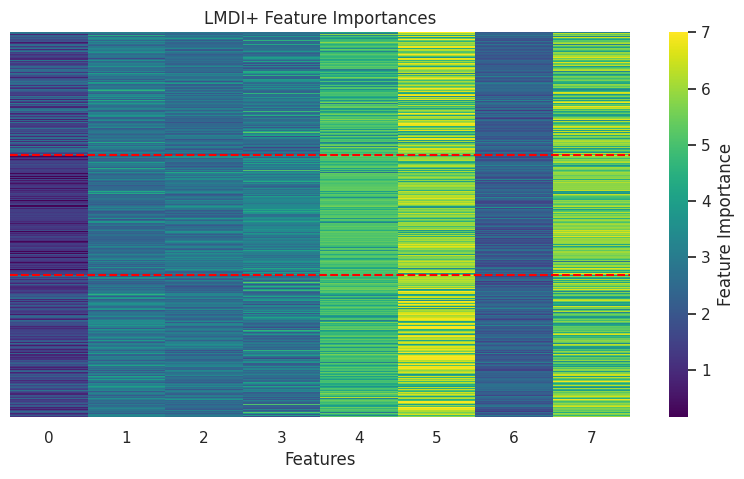

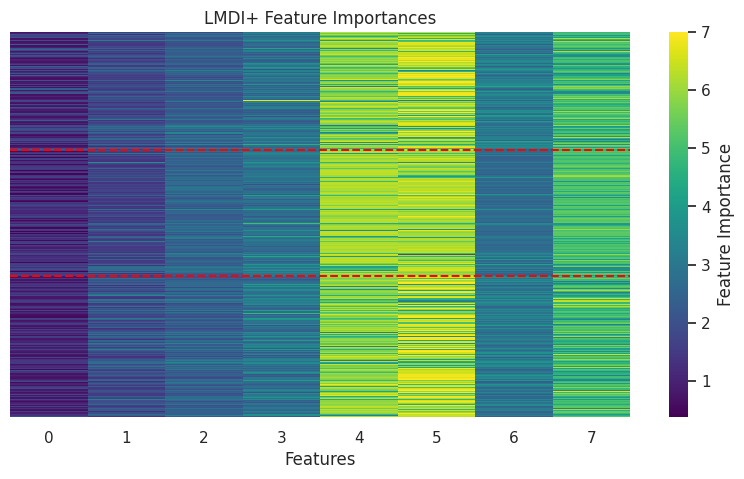

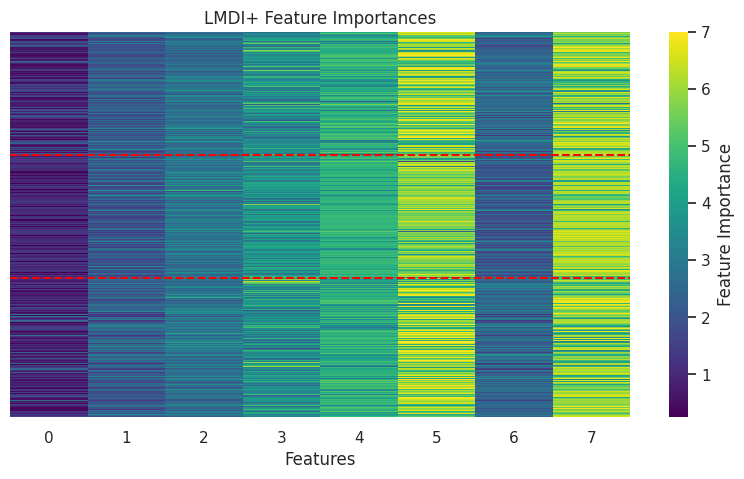

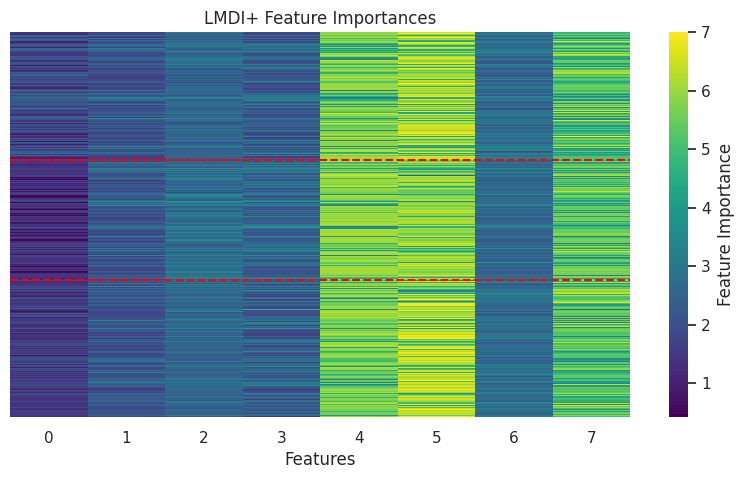

In [23]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(lotla_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LMDI+ Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=first_breakpoint[i], color='red', linestyle='--')
    plt.axhline(y=second_breakpoint[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()

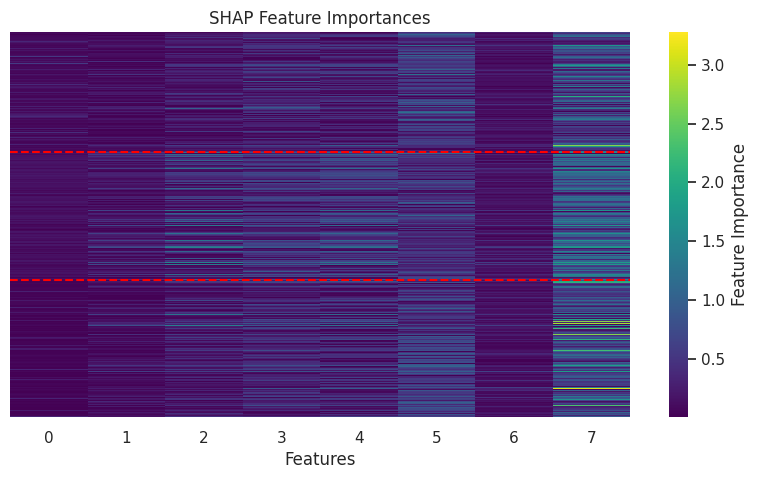

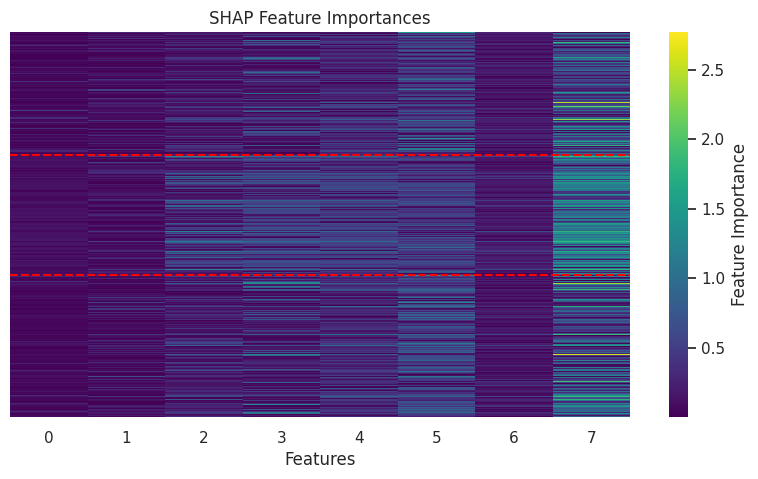

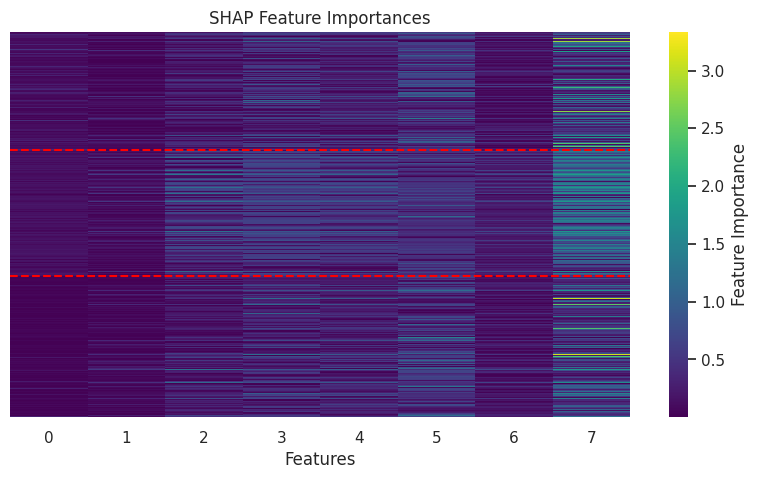

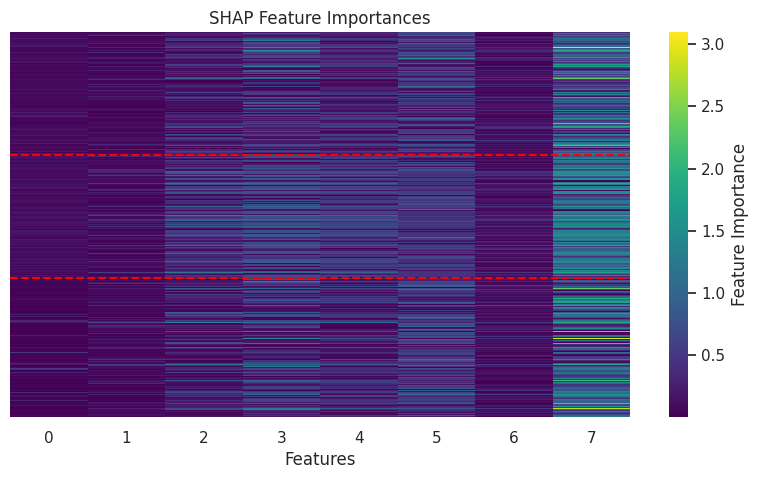

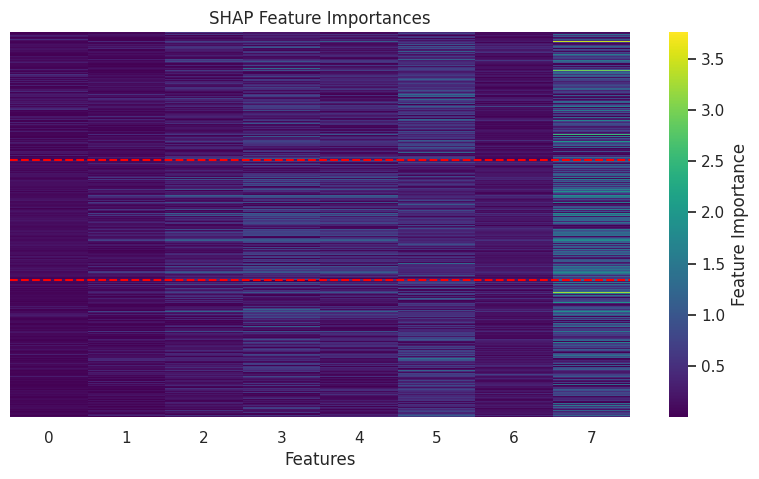

In [24]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(np.abs(shap_values[i]), cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("SHAP Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=first_breakpoint[i], color='red', linestyle='--')
    plt.axhline(y=second_breakpoint[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()

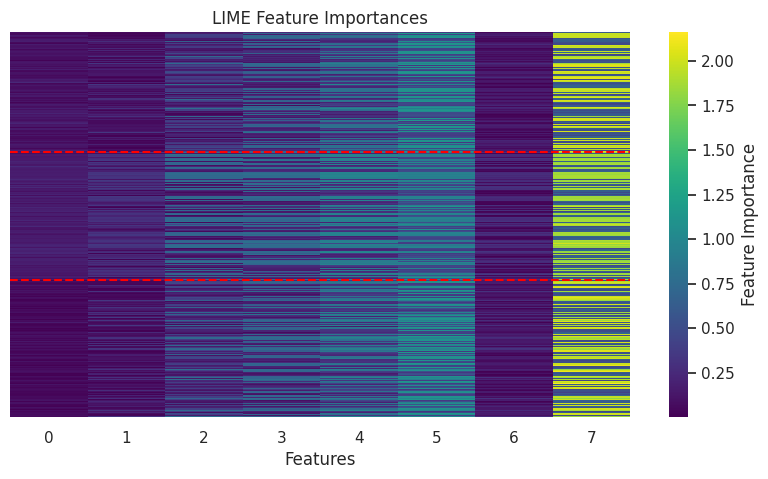

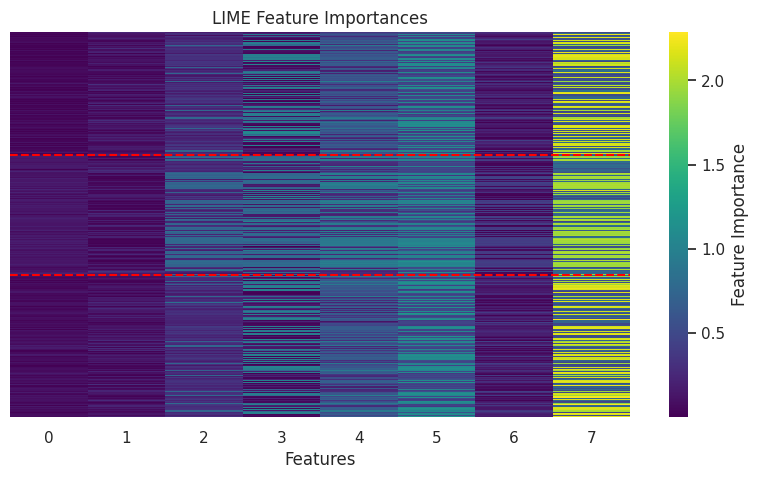

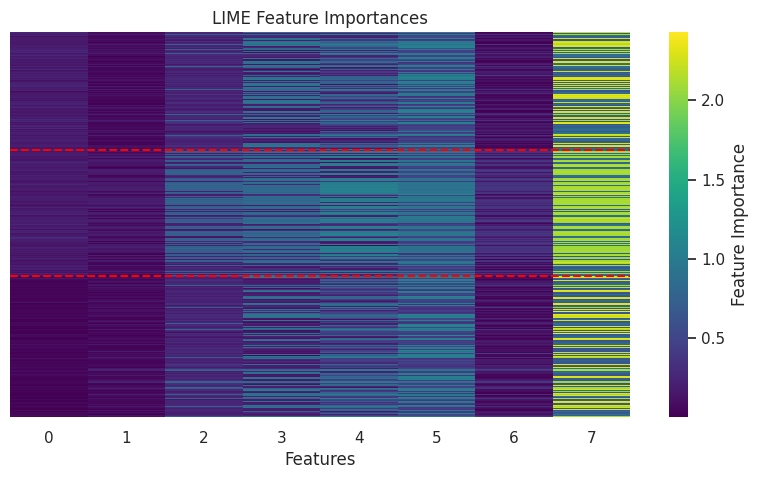

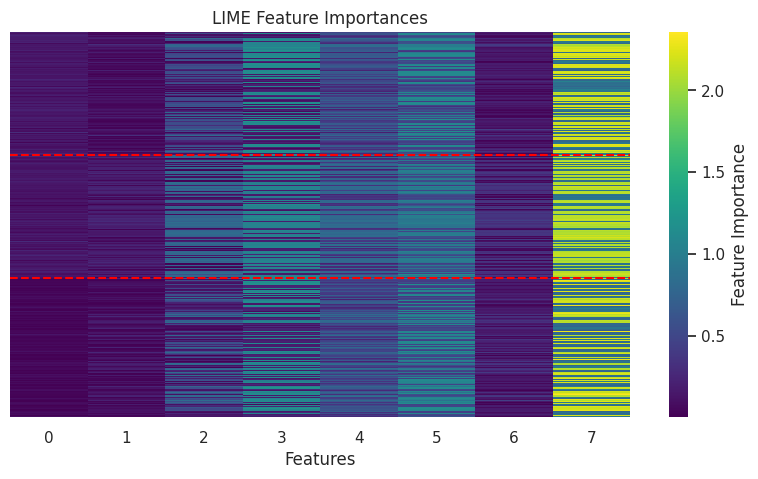

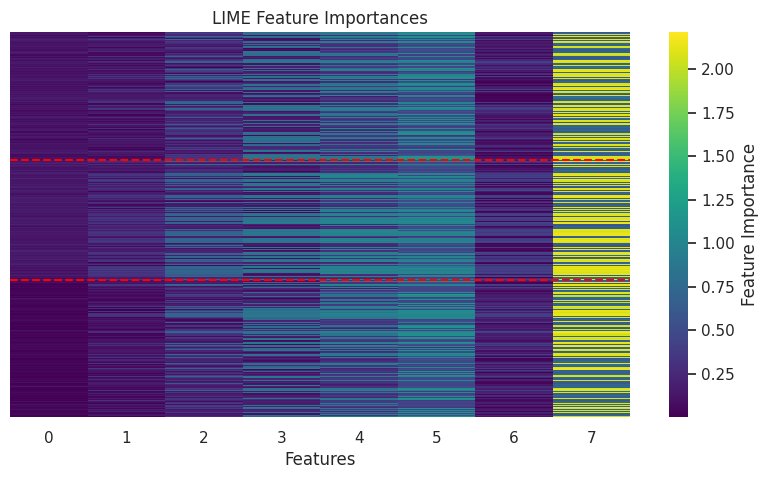

In [25]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(np.abs(lime_values[i]), cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LIME Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=first_breakpoint[i], color='red', linestyle='--')
    plt.axhline(y=second_breakpoint[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()

In [11]:
# read in feature importances
base_dir = "lfi-values/fulldata/rf/"
lotla_values = {}
shap_values = {}
lime_values = {}
women_count = {}
for seed in range(4):
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    sorted_idx = X_test['sex_1'].argsort()
    women_count[seed] = np.bincount(X_test['sex_1'])[0]
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons-nogender/elastic_nonnormed_nosquared_rank.csv", delimiter=",")[sorted_idx]
    shap_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons-nogender/shap.csv", delimiter=",")[sorted_idx]
    lime_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons-nogender/lime.csv", delimiter=",")[sorted_idx]